## Installs and Imports

In [14]:

%pip install autoray
%pip install opt_einsum

!pip install --no-deps -U git+https://github.com/jcmgray/quimb.git@08ab4805df6be023e1027503b8c0915e1bf50b34
%pip install -U git+https://github.com/jcmgray/cotengra.git
!pip install kahypar

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jcmgray/quimb.git (to revision 08ab4805df6be023e1027503b8c0915e1bf50b34) to /tmp/pip-req-build-h3gsp26a
  Running command git clone --filter=blob:none --quiet https://github.com/jcmgray/quimb.git /tmp/pip-req-build-h3gsp26a
  Running command git rev-parse -q --verify 'sha^08ab4805df6be023e1027503b8c0915e1bf50b34'
  Running command git fetch -q https://github.com/jcmgray/quimb.git 08ab4805df6be023e1027503b8c0915e1bf50b34
  Running command git checkout -q 08ab4805df6be023e1027503b8c0915e1bf50b34
  Resolved https://github.com/jcmgray/quimb.git to commit 08ab4805df6be023e1027503b8c0915e1bf50b34
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/jcmgray/cotengra.git to /tmp/pip-req-build-3x6uor37
  Running command git clone --filter=blob:none --quiet https://github.com/jcmgray/cotengra.git /tmp/pip-req-build-3x6uo

In [15]:
# just set up some misc notebook plotting stuff

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [16]:
import sys; sys.path.append('..')
import matplotlib.pyplot as plt
import quimb.tensor as qtn
import cotengra as ctg
import quimb as qu
import numpy as np
import time, random

In [17]:
import pyzx as zx
import importlib
importlib.reload(zx)

<module 'pyzx' from '/home/snehal/pyzx/pyzx/__init__.py'>

# Main

In [18]:
zx.settings.drawing_backend = 'matplotlib'
%matplotlib inline 
def show(g):
  return zx.draw_matplotlib(g,labels=True,h_edge_draw='box')

In [19]:
def load_circuit(
    n=53,
    depth=10,
    seed=0 ,
    elided=0,
    sequence='ABCDCDAB',
    swap_trick=False
):
    file = f'circuit_n{n}_m{depth}_s{seed}_e{elided}_p{sequence}.qsim'

    if swap_trick:
        gate_opts={'contract': 'swap-split-gate', 'max_bond': 2}  
    else:
        gate_opts={}
    
    # instantiate the `Circuit` object that 
    # constructs the initial tensor network:
    return zx.Circuit.from_qsim_file(file)

In [20]:
circ = zx.Circuit.from_qsim_file('circuit_n53_m10_s0_e0_pABCDCDAB.qsim')

In [21]:
g = circ.to_graph(zh=True)

In [22]:
qubits = 53
g.apply_state("0" * qubits)  # use kets 0 as inputs
g.apply_effect("0" *qubits)

In [23]:
quimb_tn = zx.to_quimb_tensor(g)


In [24]:
quimb_tn.astype_('complex64')

<TensorNetwork(tensors=13035, indices=7672)>

In [25]:
opt = ctg.HyperOptimizer(
    methods=['kahypar', 'greedy'],
    max_repeats=128,
    progbar=True,
    minimize='flops',
    score_compression=0.5,  # deliberately make the optimizer try many methods 
)

In [27]:
info = quimb_tn.contract(all, optimize=opt,output_inds=(), get='path-info')

log2[SIZE]: inf log10[FLOPs]: inf:   0%|          | 0/128 [00:00<?, ?it/s]


BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

In [ ]:
tree = opt.get_tree()
f'{tree.contraction_cost():e}'

In [ ]:
zx.full_reduce(g,quiet=False)


spider_simp: 240. 142. 49.  3 iterations
id_simp: 129.  1 iterations
spider_simp: 43. 43.  2 iterations
lcomp_simp: 311. 35. 1.  3 iterations
pivot_gadget_simp: 124. 61. 25. 15. 1.  5 iterations
id_simp: 35.  1 iterations
spider_simp: 19. 13. 3.  3 iterations
gadget_simp: 57.  1 iterations
id_simp: 19.  1 iterations
spider_simp: 19.  1 iterations
pivot_gadget_simp: 19.  1 iterations


In [ ]:
qtn = zx.to_quimb_tensor(g)
qtn

<TensorNetwork(tensors=490, indices=240)>

In [ ]:
qtn.contract(output_inds=())

(4.388721754787585e-12-6.0992332087521625e-12j)

In [ ]:
qtn.astype_('complex64')

<TensorNetwork(tensors=124, indices=60)>

In [ ]:
quimb_tn = zx.to_quimb_tensor(g)
quimb_tn.full_simplify_('ADRCSL',output_inds=())
quimb_tn.astype_('complex64')

<TensorNetwork(tensors=1, indices=0)>

In [ ]:
quimb_tn.contract(output_inds=())

(-5.177906e-12-1.4671429e-12j)

In [ ]:
# quimb_tn.graph(initial_layout='kamada_kawai', iterations=10,  legend=False, figsize=(10, 10))

In [ ]:
opt = ctg.HyperOptimizer(
    methods=['kahypar', 'greedy'],
    max_repeats=128,
    progbar=True,
    minimize='flops',
    score_compression=0.5,  # deliberately make the optimizer try many methods 
)

In [ ]:
!pip install igraph

In [ ]:
info = quimb_tn.contract(all, optimize=opt,output_inds=(), get='path-info')

log2[SIZE]: 28.00 log10[FLOPs]: 10.62: 100%|██████████| 128/128 [03:09<00:00,  1.48s/it]


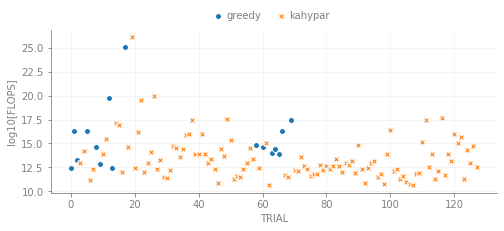

In [ ]:
opt.plot_trials(y='flops')

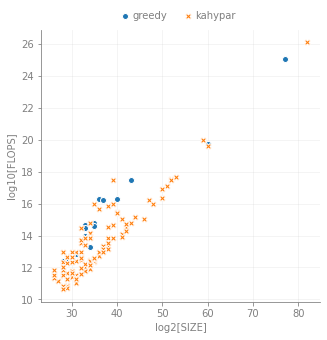

In [ ]:
opt.plot_scatter()

In [ ]:
tree = opt.get_tree()
f'{tree.contraction_cost():e}'

'2.096900e+10'

In [ ]:
f'{tree.contraction_width():e}'

'2.800000e+01'

In [ ]:
g1 = g.copy()

In [ ]:
g==g1

False

In [ ]:
from pyzx.hsimplify import zh_simp
zh_simp(g,quiet=False)

spider_simp: 75. 48. 26.  3 iterations
id_simp: 24.  1 iterations
spider_simp: 12. 12.  2 iterations
copy_simp: 28.  1 iterations
spider_simp: 34. 6.  2 iterations
id_simp: 6.  1 iterations
spider_simp: 6.  1 iterations
id_simp: 6.  1 iterations
spider_simp: 6.  1 iterations
lcomp_simp: 100. 9.  2 iterations
id_simp: 6.  1 iterations
spider_simp: 6.  1 iterations
pivot_gadget_simp: 13. 8.  2 iterations
id_simp: 4.  1 iterations
spider_simp: 4.  1 iterations
hpivot: 1.  1 iterations
par_hbox_simp: 3.  1 iterations
hpivot: 1.  1 iterations
par_hbox_simp: 3.  1 iterations
hpivot: 1.  1 iterations
par_hbox_simp: 2.  1 iterations
hpivot: 1.  1 iterations
par_hbox_simp: 2.  1 iterations
hpivot: 1.  1 iterations
par_hbox_simp: 3.  1 iterations
hpivot: 1.  1 iterations
par_hbox_simp: 1.  1 iterations
copy_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
hpivot: 1.  1 iterations
par_hbox_simp: 1.  1 iterations
copy_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
hpivot: 1.  1 iteration

45

In [ ]:
quimb_tn = zx.to_quimb_tensor(g)
quimb_tn.astype_('complex64')

<TensorNetwork(tensors=111, indices=62)>

In [ ]:
quimb_tn.contract(output_inds=())

(3.1159363e-13-5.7327867e-15j)

In [ ]:
quimb_tn.full_simplify_('LRSAD',output_inds=())
quimb_tn.astype_('complex64')

<TensorNetwork(tensors=1, indices=0)>

In [ ]:
quimb_tn.contract()

(-6.6804094e-24+1.6382564e-25j)

In [ ]:
opt2 = ctg.HyperOptimizer(
    methods=['kahypar', 'greedy'],
    max_repeats=128,
    progbar=True,
    minimize='flops',
    score_compression=0.5,  # deliberately make the optimizer try many methods 
)

In [ ]:
info = quimb_tn.contract(all, optimize=opt2,output_inds=(), get='path-info')

log2[SIZE]: 14.00 log10[FLOPs]: 6.14: 100%|██████████| 128/128 [00:21<00:00,  6.01it/s]


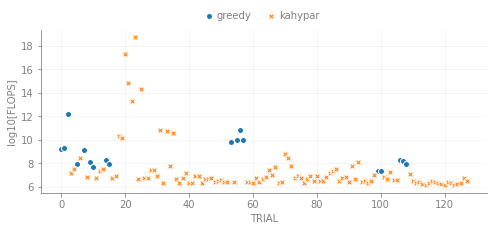

In [ ]:
opt2.plot_trials(y='flops')

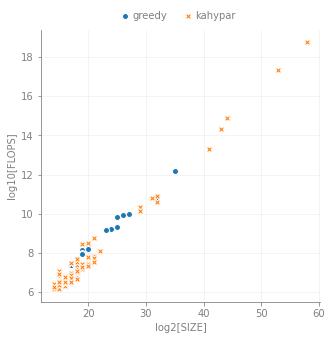

In [ ]:
opt2.plot_scatter()

In [ ]:
tree = opt2.get_tree()
f'{tree.contraction_cost():e}'

'6.867160e+05'

In [ ]:
f'{tree.contraction_width():e}'

'1.500000e+01'

In [ ]:
g1.to_quimb_tensor()

NameError: name 'g1' is not defined